## Problem Statement
-  sentiment behind a specific tweet will impact a company, or a person's, brand for being viral (positive), or devastate profit because it strikes a negative tone.
- Capturing sentiment in language is important in these times where decisions and reactions are created and updated in seconds.
- pick out the part of the tweet (word or phrase) that reflects the sentiment.
 
## Objective 
- Your objective in this competition is to construct a model that can do the same - look at the labeled sentiment for a given tweet and figure out what word or phrase best supports it.


In [1]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns


In [2]:
twitter = pd.read_csv("train.csv")

In [3]:
twitter.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [4]:
twitter.shape

(27481, 4)

In [5]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


- __No of rows 27481__

- __No of columns 4__

In [6]:
twitter.isnull().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

In [7]:
# get rid of null value rows
twitter.dropna(inplace=True)

In [8]:
twitter.isnull().sum()

textID           0
text             0
selected_text    0
sentiment        0
dtype: int64

In [9]:
twitter.describe()

,textID,text,selected_text,sentiment
count,27480,27480,27480,27480
unique,27480,27480,22463,3
top,c6a48bcc9c,Outz wif the BIG BIG BIG HAPPY FAMILY for momm...,good,neutral
freq,1,1,199,11117


In [10]:
sentiment_count = twitter["sentiment"].value_counts().reset_index() # Convert it to Data Frame
sentiment_count.style.background_gradient(cmap='Purples')

,index,sentiment
0,neutral,11117
1,positive,8582
2,negative,7781


In [11]:
type(sentiment_count)

pandas.core.frame.DataFrame

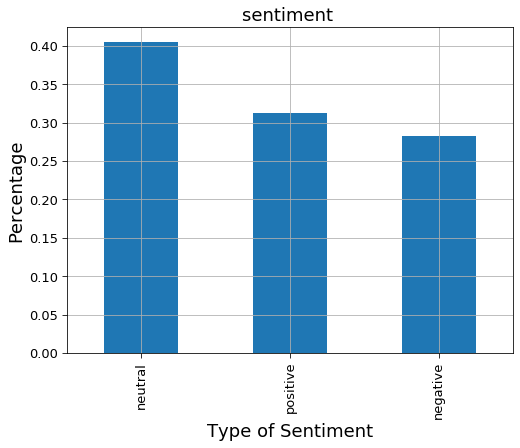

In [12]:
plt.figure(figsize=(8,6))
twitter["sentiment"].value_counts(normalize=True).plot.bar()
plt.title("sentiment ",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Type of Sentiment",fontsize=18)
plt.ylabel("Percentage",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

In [13]:
twitter[twitter["sentiment"]=="neutral"][["text","selected_text"]]

,text,selected_text
0,"I`d have responded, if I were going","I`d have responded, if I were going"
5,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...
7,Soooo high,Soooo high
8,Both of you,Both of you
10,"as much as i love to be hopeful, i reckon the...","as much as i love to be hopeful, i reckon the ..."
...,...,...
27468,"few grilled mushrooms and olives, feta cheese ...","few grilled mushrooms and olives, feta cheese ..."
27469,94 more days till BH comes back to LA,94 more days till BH comes back to LA
27471,"i`m defying gravity. and nobody in alll of oz,...","i`m defying gravity. and nobody in alll of oz,..."
27473,in spoke to you yesterday and u didnt respond...,in spoke to you yesterday and u didnt respond ...


- For neutral sentiment , the text and selected are same. So when we calculate the jaccarad similarity it will be close to 1
- Jaccard similarity coefficient, defined as the size of the intersection divided by the size of the union of two label sets,

In [14]:
def calculate_jaccard(s1,s2):
    a = set(s1.lower().split()) 
    b = set(s2.lower().split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))
    

In [16]:
jaccard_info = list()

for i,row in twitter.iterrows():
    s1= row.text
    s2 = row.selected_text
    score = calculate_jaccard(s1,s2)
    jaccard_info.append([s1,s2,score])

In [18]:
jaccard_info[2]

['my boss is bullying me...', 'bullying me', 0.16666666666666666]

In [19]:
# Add the jaccard_info to the twitter dataset
jaccard = pd.DataFrame(jaccard_info,columns=["text","selected_text","jaccard_score"])
twitter = twitter.merge(jaccard,how='outer')

In [20]:
twitter.head()

,textID,text,selected_text,sentiment,jaccard_score
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,1.000000
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,0.200000
2,088c60f138,my boss is bullying me...,bullying me,negative,0.166667
3,9642c003ef,what interview! leave me alone,leave me alone,negative,0.600000
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,0.214286


In [29]:
twitter[twitter["sentiment"]=="neutral"]["jaccard_score"].value_counts().reset_index().style.background_gradient(cmap='Purples')

,index,jaccard_score
0,1.000000,10012
1,0.857143,52
2,0.750000,50
3,0.875000,49
4,0.800000,48
5,0.833333,47
6,0.900000,47
7,0.909091,40
8,0.888889,37
9,0.666667,33


## Calculate no fo words and distributions in selected_text

In [32]:
twitter["selected_text_count"]=twitter["selected_text"].apply(lambda x: len(str(x).split()))

In [37]:
twitter["selected_text_count"].min()

1

In [38]:
twitter["selected_text_count"].max()

33

In [39]:
twitter.head()

,textID,text,selected_text,sentiment,jaccard_score,selected_text_count
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,1.000000,7
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,0.200000,2
2,088c60f138,my boss is bullying me...,bullying me,negative,0.166667,2
3,9642c003ef,what interview! leave me alone,leave me alone,negative,0.600000,3
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,0.214286,3


In [42]:
twitter['text_word_count'] = twitter['text'].apply(lambda x:len(str(x).split()))

In [43]:
# twitter.drop(columns=["Num_word_text"],inplace=True,axis=1)

In [44]:
twitter.head()

,textID,text,selected_text,sentiment,jaccard_score,selected_text_count,text_word_count
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,1.000000,7,7
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,0.200000,2,10
2,088c60f138,my boss is bullying me...,bullying me,negative,0.166667,2,5
3,9642c003ef,what interview! leave me alone,leave me alone,negative,0.600000,3,5
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,0.214286,3,14


In [45]:
twitter["difference_word_count"] = twitter['text_word_count'] - twitter["selected_text_count"]

In [46]:
twitter.head()

,textID,text,selected_text,sentiment,jaccard_score,selected_text_count,text_word_count,difference_word_count
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,1.000000,7,7,0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,0.200000,2,10,8
2,088c60f138,my boss is bullying me...,bullying me,negative,0.166667,2,5,3
3,9642c003ef,what interview! leave me alone,leave me alone,negative,0.600000,3,5,2
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,0.214286,3,14,11


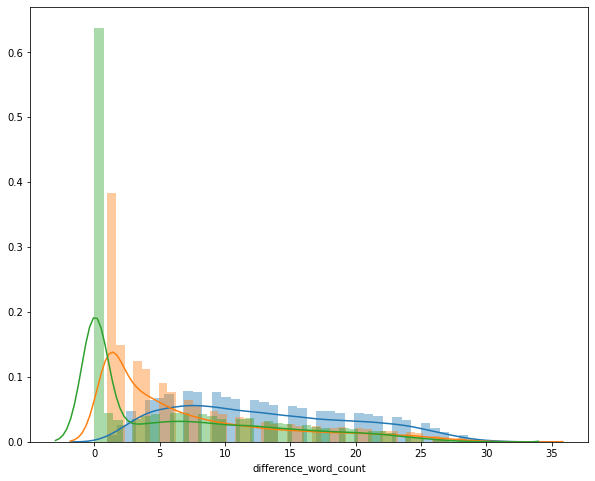

In [50]:
# twitter['text_word_count'].plot.hist()
# twitter["selected_text_count"]
# twitter["difference_word_count"]
plt.figure(figsize=(10,8))
sns.distplot(twitter['text_word_count'])
sns.distplot(twitter['selected_text_count'])
sns.distplot(twitter['difference_word_count'])

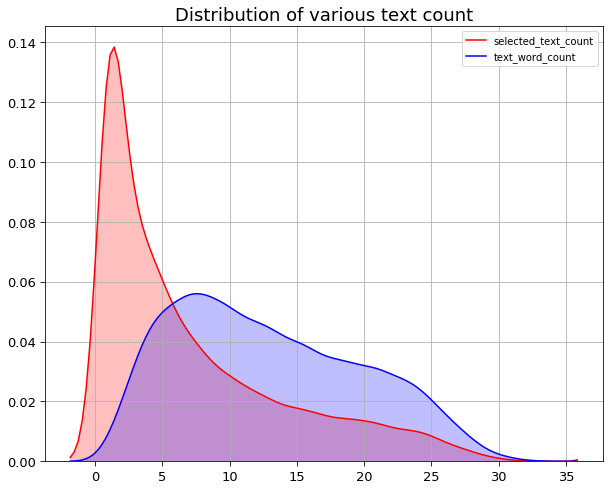

In [57]:
plt.figure(figsize=(10,8))
sns.kdeplot(twitter['selected_text_count'], shade=True, color="r")
sns.kdeplot(twitter['text_word_count'], shade=True, color="b")
plt.title("Distribution of various text count",fontsize=18)
plt.grid(0.3)
plt.tick_params(size=5,labelsize = 13)

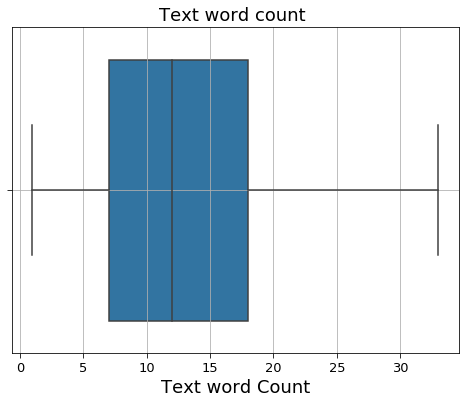

In [64]:
plt.figure(figsize=(8,6))
sns.boxplot(twitter['text_word_count'])
plt.title("Text word count ",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Text word Count",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)

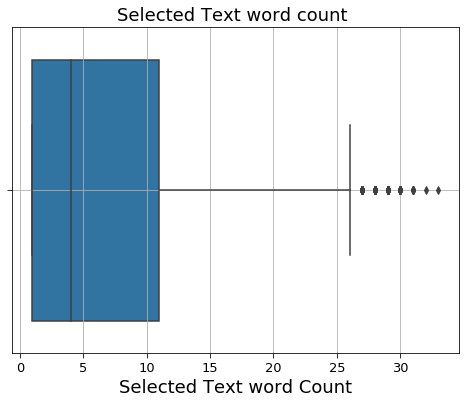

In [63]:
plt.figure(figsize=(8,6))
sns.boxplot(twitter['selected_text_count'])
plt.title("Selected Text word count ",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Selected Text word Count",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.grid(0.3)